In [1]:
# Baseball Case Study

In [2]:
# Problem Statement:
# This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.
# There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.
# Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
# Output: Number of predicted wins (W)

In [3]:
# First of all import all the required libraries

In [6]:
#Importing required packages.

import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering

from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import joblib as jb


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Importing Dataset and Data Information

In [23]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [24]:
#Let's check how the data is distributed
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
# Reviewing Data Set at initial stage, found continous datatypes; Target variable data is "Number of predicted wins (W)" which seems to represent regression problem

In [9]:
# Understanding Dataset

In [12]:
# Features:

#R: Runs,

#AB: At Bats

#H: Hits

#2B: Doubles

#3B: Triples

#HR: Homeruns

#BB: Walks

#SO: Strikeouts

#SB: Stolen Bases

#RA: Runs Allowed

#ER: Earned Runs

#ERA: Earned Run Average (ERA)

#CG: Shutouts

#SV: Saves,

#SHO: Complete Games

#E: Errors

    
# Target:

# W: Win

In [25]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [14]:
# Here we can see that we have only one float data type i.e ERA: Earned Run Average (ERA) and rest all other 16 columns are intiger datatype.

In [26]:
# no. of rows and coloumns
df.shape

(30, 17)

In [16]:
# There are 30 Rows and 17 Columns in Data Set

In [27]:
# check for null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [18]:
# There are no null or missing values present in data set and no need to change the datatype as they are appropriate so we can skip the step of data conversion part and do the the Visualization part. We can also see the null values representation through heatmap

<AxesSubplot:>

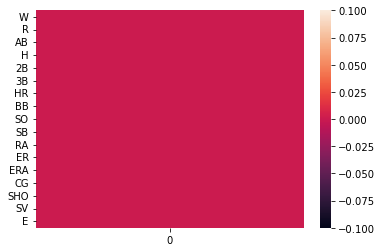

In [28]:
sns.heatmap(df.isnull().sum().to_frame())

In [29]:
# check the statestics of dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [20]:
# here we can see the count,mean,std deviation,min,max,1st,2nd and 3rd quartile value of each column

In [21]:
# As we can see the dataset containts continous data so we will now visualize distribution of continous features

In [22]:
# we can see the distribution level for each feachers by using displot

<AxesSubplot:xlabel='W', ylabel='Density'>

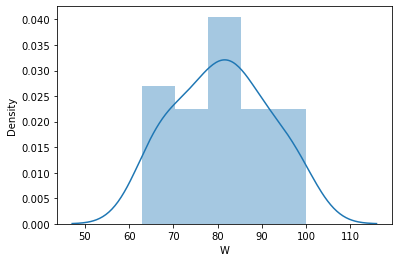

In [30]:
sns.distplot(df['W'])

<AxesSubplot:xlabel='R', ylabel='Density'>

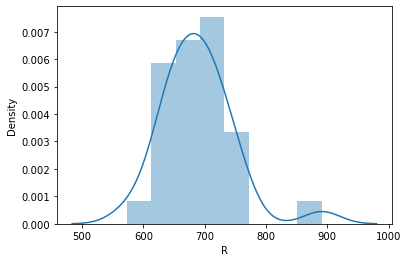

In [46]:
sns.distplot(df['R'])

<AxesSubplot:xlabel='AB', ylabel='Density'>

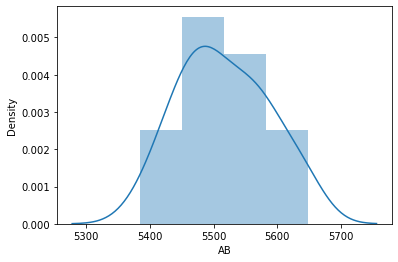

In [47]:
sns.distplot(df['AB'])

<AxesSubplot:xlabel='H', ylabel='Density'>

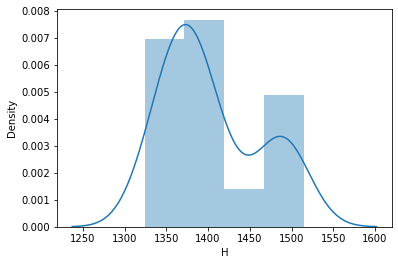

In [48]:
sns.distplot(df['H'])

<AxesSubplot:xlabel='2B', ylabel='Density'>

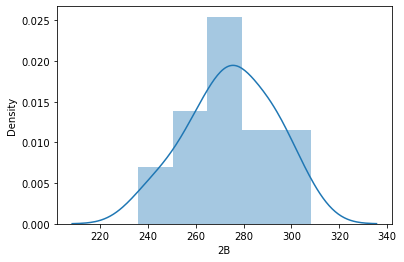

In [49]:
sns.distplot(df['2B'])

<AxesSubplot:xlabel='3B', ylabel='Density'>

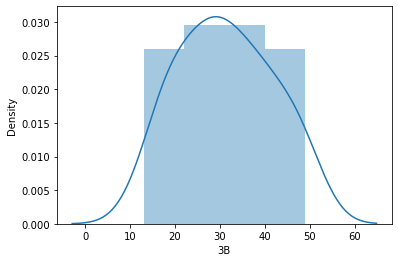

In [50]:
sns.distplot(df['3B'])

<AxesSubplot:xlabel='HR', ylabel='Density'>

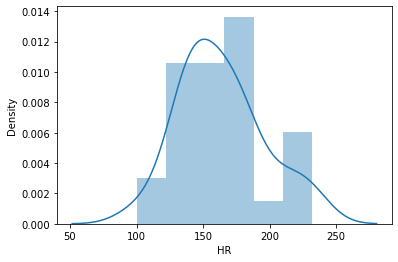

In [51]:
sns.distplot(df['HR'])

<AxesSubplot:xlabel='BB', ylabel='Density'>

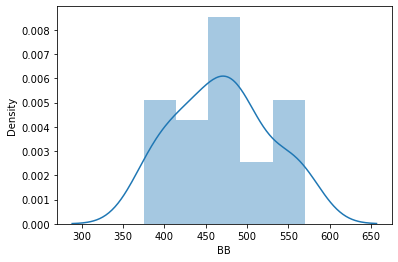

In [52]:
sns.distplot(df['BB'])

<AxesSubplot:xlabel='SO', ylabel='Density'>

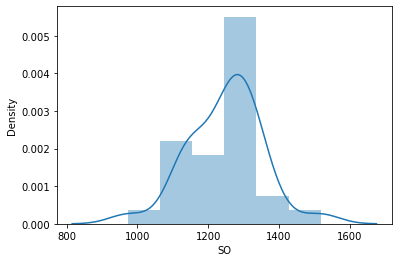

In [53]:
sns.distplot(df['SO'])

<AxesSubplot:xlabel='SB', ylabel='Density'>

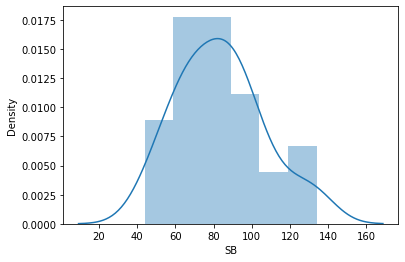

In [54]:
sns.distplot(df['SB'])

<AxesSubplot:xlabel='RA', ylabel='Density'>

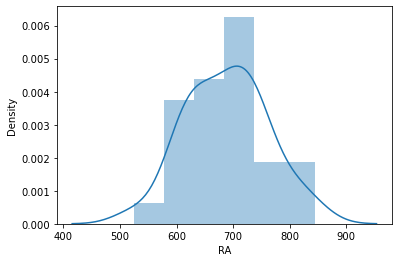

In [55]:
sns.distplot(df['RA'])

<AxesSubplot:xlabel='ER', ylabel='Density'>

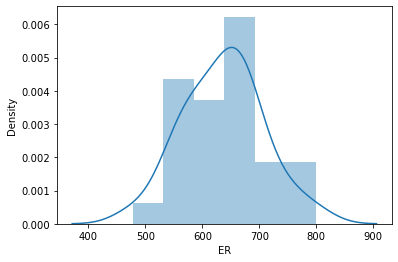

In [56]:
sns.distplot(df['ER'])

<AxesSubplot:xlabel='ERA', ylabel='Density'>

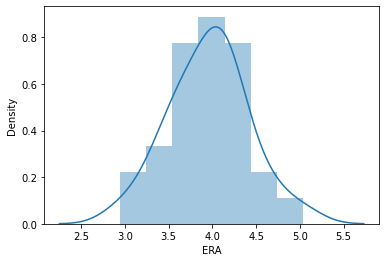

In [57]:
sns.distplot(df['ERA'])

<AxesSubplot:xlabel='CG', ylabel='Density'>

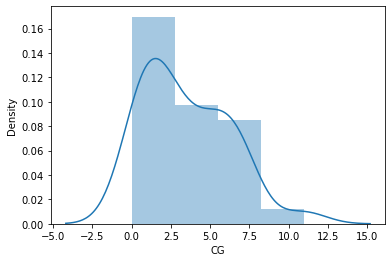

In [58]:
sns.distplot(df['CG'])

<AxesSubplot:xlabel='SHO', ylabel='Density'>

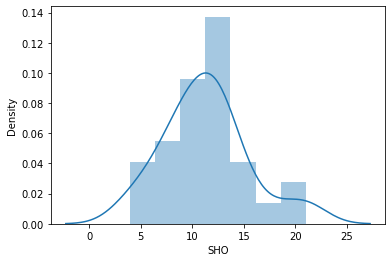

In [59]:
sns.distplot(df['SHO'])

<AxesSubplot:xlabel='SV', ylabel='Density'>

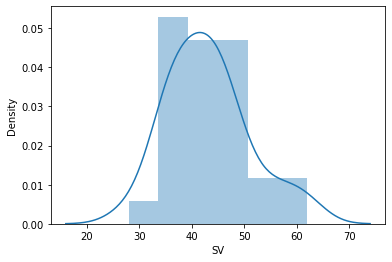

In [60]:
sns.distplot(df['SV'])

<AxesSubplot:xlabel='E', ylabel='Density'>

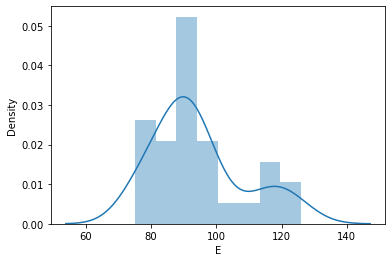

In [61]:
sns.distplot(df['E'])

In [62]:
# We can see the skewness in most of data through above distplots.

In [63]:
# Now we will analyse the Relationship between the Target Variables and Features using Scatter Plot

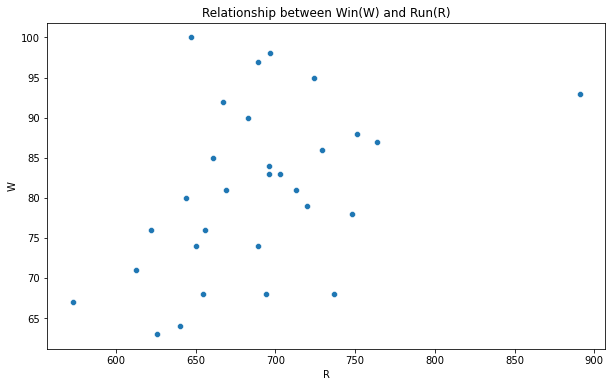

In [66]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and Run(R)')
sns.scatterplot(df['R'], df['W']);

In [67]:
# From above plot we can see that Run and win are linearly correlated. And outliers are present between 850 and 900

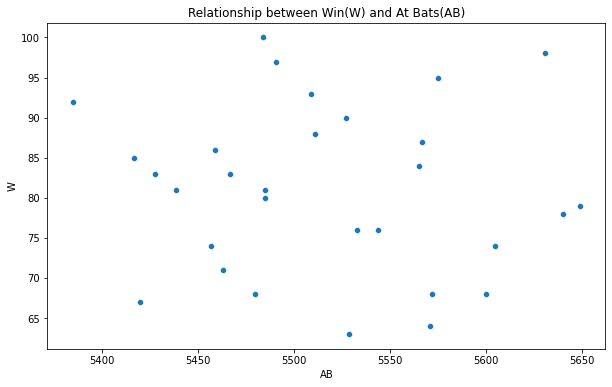

In [98]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and At Bats(AB)')
sns.scatterplot(df['AB'], df['W']);

In [69]:
# from above plot we can see that At bats is very weekly related to Wins With no outliers present.

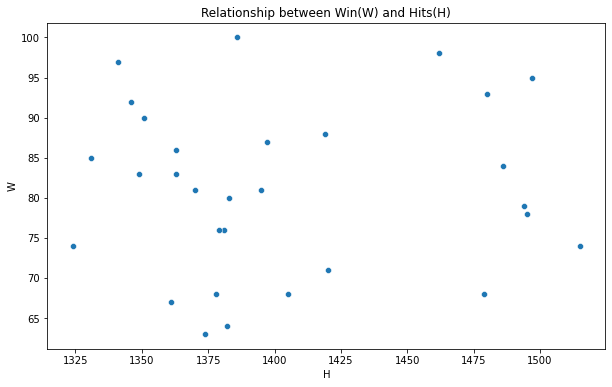

In [70]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and Hits(H)')
sns.scatterplot(df['H'], df['W']);

In [71]:
# from the above plot we can see that Hits are also very weekly related to winning with no outliers present.

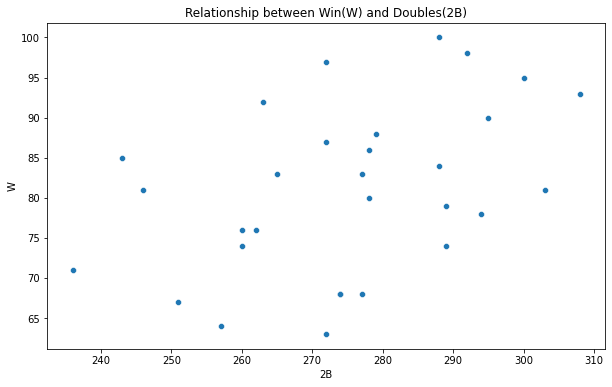

In [73]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and Doubles(2B)')
sns.scatterplot(df['2B'], df['W']);

In [74]:
# from the above plot we can see that Doubles are linearly related with Wins, with no outlier, and data is left-skewed

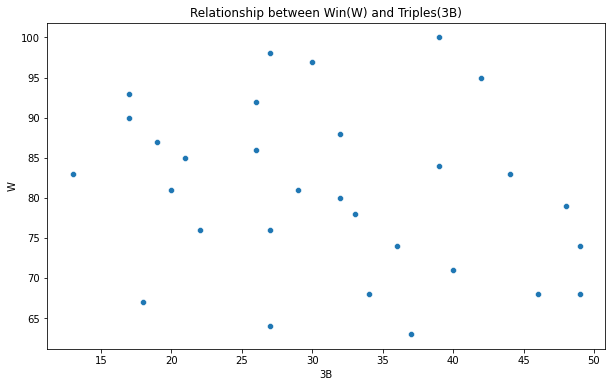

In [75]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and Triples(3B)')
sns.scatterplot(df['3B'], df['W']);

In [76]:
# from the above plot we can see that Triple has very weak negative correlations with win with no outlier and data is right-skewed

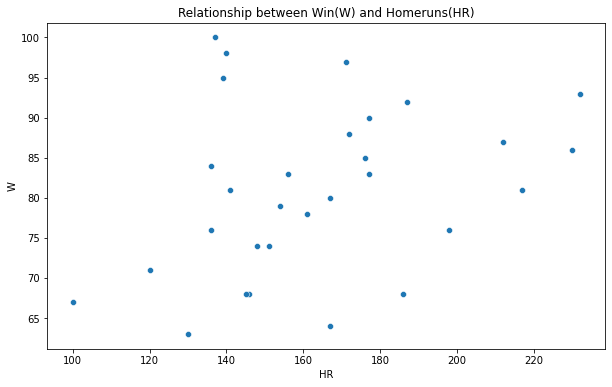

In [77]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and Homeruns(HR)')
sns.scatterplot(df['HR'], df['W']);

In [78]:
# from the above plot we can see that the home run has a very low correlation with wins with no outliers and data is right-skewed

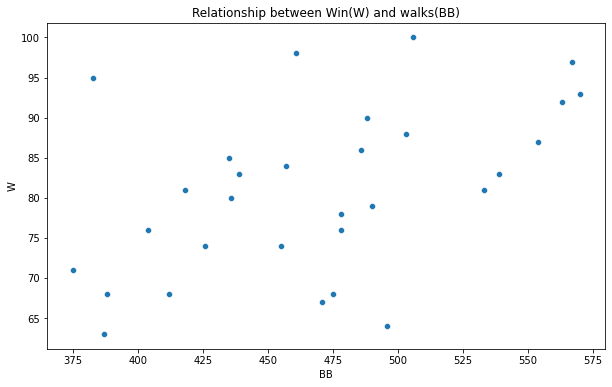

In [79]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and walks(BB)')
sns.scatterplot(df['BB'], df['W']);

In [80]:
# from above plot we can see that Walk is lightly correlated to win with no outlier present

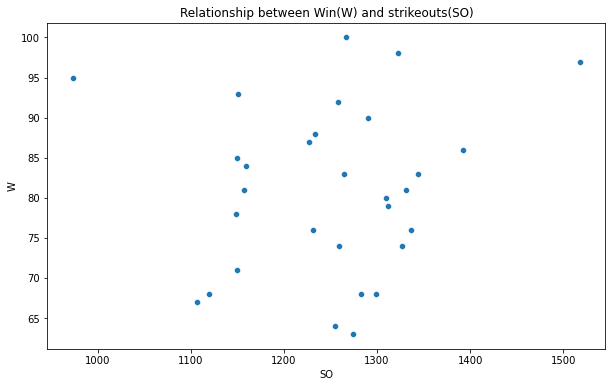

In [81]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and strikeouts(SO)')
sns.scatterplot(df['SO'], df['W']);

In [82]:
# from above plot we can see that Strikeout is not correlated to win with no outlier and the dataset is left-skewed

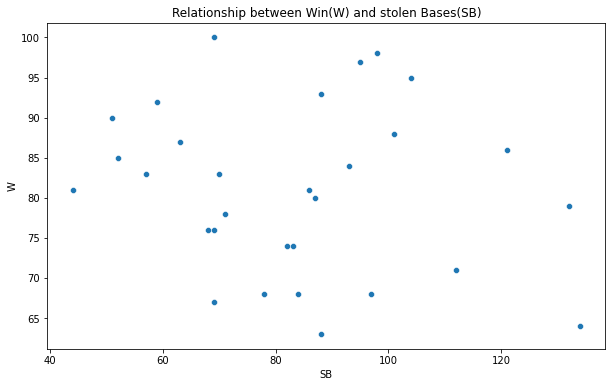

In [83]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and stolen Bases(SB)')
sns.scatterplot(df['SB'], df['W']);

In [84]:
# from the above plot we can see that Stolen Bases is not correlated to win with no outlier present

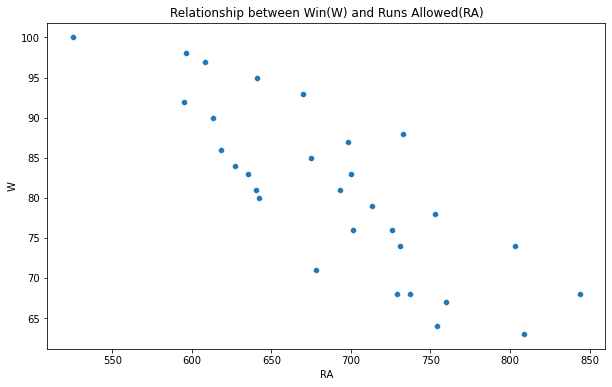

In [99]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and Runs Allowed(RA)')
sns.scatterplot(df['RA'], df['W']);

In [86]:
# from the above plot we can see that Runs Allowed is highly correlated to win with no outliers present

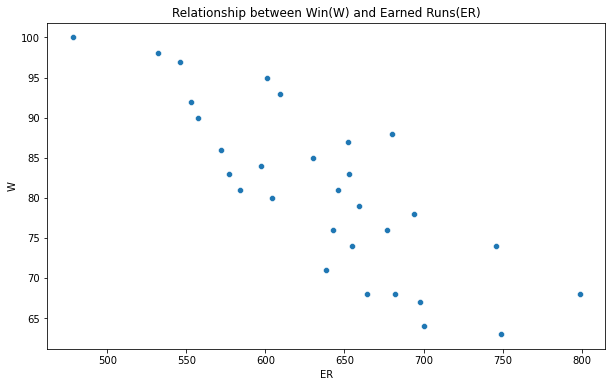

In [87]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and Earned Runs(ER)')
sns.scatterplot(df['ER'], df['W']);

In [88]:
# from the above plot we can see that Earned Runs is highly correlated to win with no outliers present

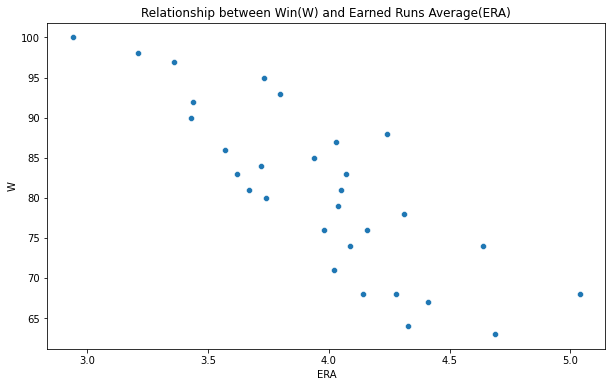

In [89]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and Earned Runs Average(ERA)')
sns.scatterplot(df['ERA'], df['W']);

In [90]:
# from the above plot we can see that Earned Run Average (ERA) is not correlated to win with no outliers present and data is right-skewed.

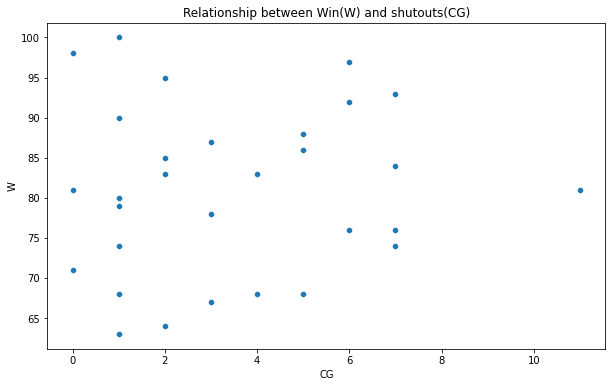

In [91]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and shutouts(CG)')
sns.scatterplot(df['CG'], df['W']);

In [92]:
# from the above plot we can see that Shutouts are highly correlated to win with no outliers present and data is right-skewed.

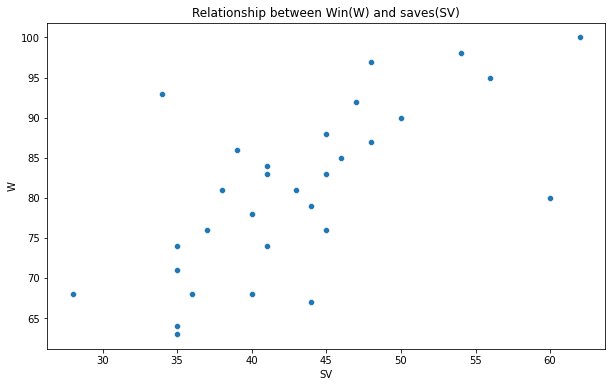

In [93]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and saves(SV)')
sns.scatterplot(df['SV'], df['W']);

In [94]:
# from the above plot we can see that Saves are lightly correlated to win with no outliers present and data is right skewed.

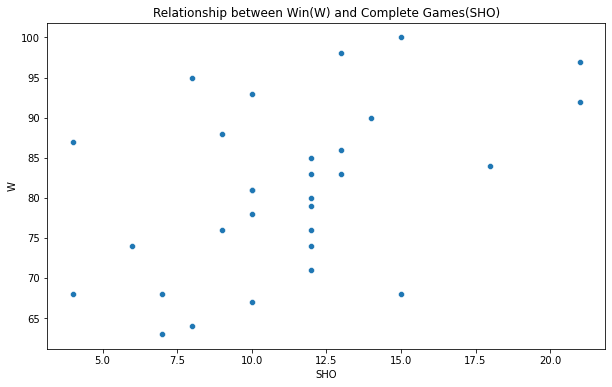

In [95]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and Complete Games(SHO)')
sns.scatterplot(df['SHO'], df['W']);

In [102]:
# from the above plot we can see that complete games are lightly correlated to win

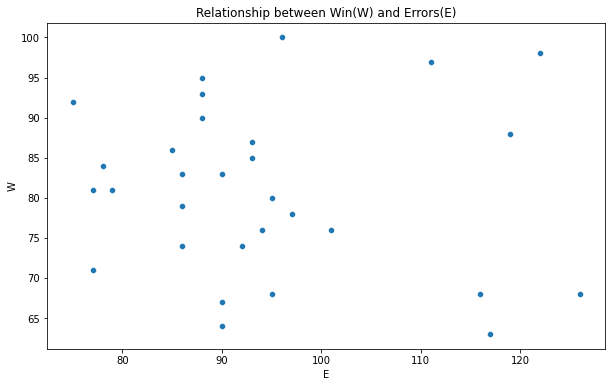

In [103]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Win(W) and Errors(E)')
sns.scatterplot(df['E'], df['W']);

In [104]:
# from the above plot we can see that Errors are not correlated to win, the data has outliers and data is right-skewed.

In [112]:
# Observation:
# The number of runs, home runs, doubles, Saves, Shutouts, and Walks are highly positively linearly correlated.
# Stolen Bases, Runs Allowed, Earned Runs are highly negative linearly correlated.
# The remaining features have less to no linear correlation with no of Wins
# The dataset set has too much randomness

In [33]:
# corelation: we can see the corelation below for all features
corr_mat=df.corr()
corr_mat

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [114]:
# Checking the Correlation between the target value and rest columns using Heatmap, Correlation Matrix

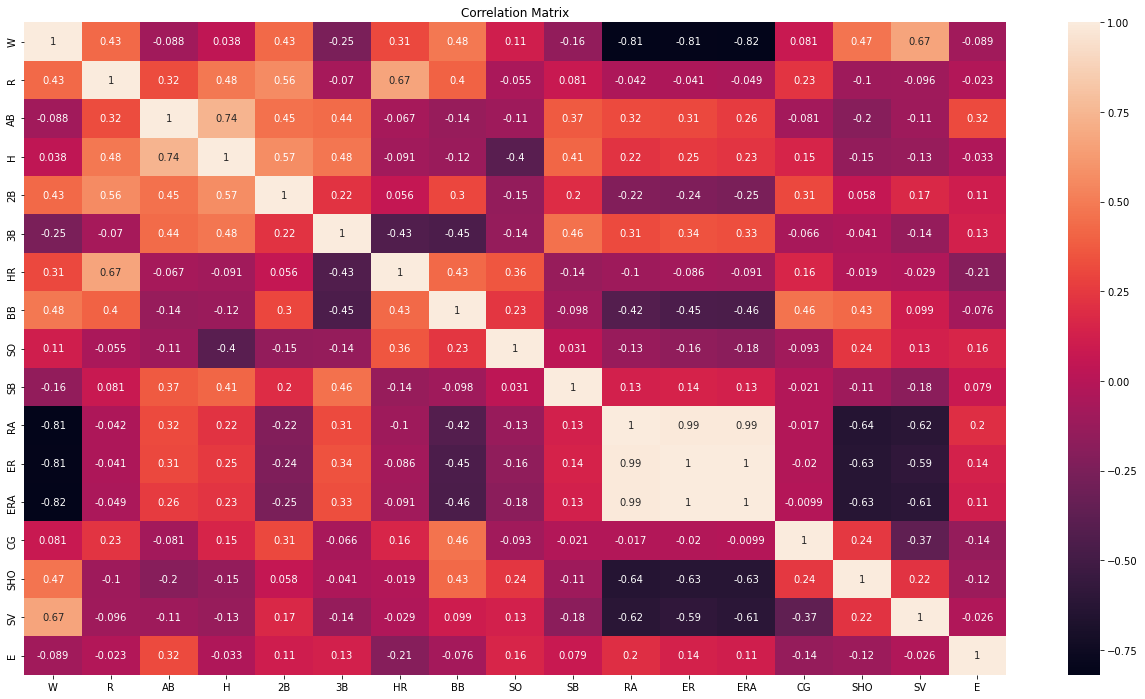

In [34]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [35]:
corr_mat["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

In [122]:
# Upon review of above corelation matrix,we found SV,BB and SHO are highly correlated with Win data and ERA,RA and ER are highly negatively corelated which coincides with the graphical data analysis done in above steps

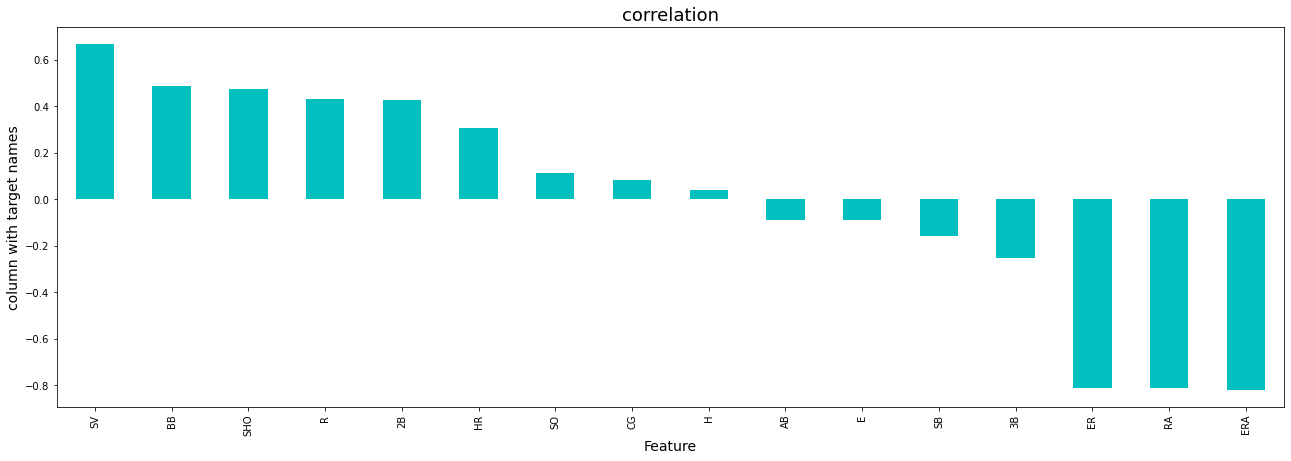

In [123]:
# we can see the corelation between features and target variable by using barplot.

plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [124]:
# Upon review of above corelation matrix,we found SV,BB,SHO,R,2B,HR,SO,CG and H are positively correlated with Win data and ERA,RA,ER,3B,SB,E and AB are negatively corelated which coincides with the graphical data analysis done in above steps

In [125]:
# Feature and Label Seperation

In [36]:
x=df.drop("W",axis=1)
y=df["W"]

In [127]:
# Skewness

In [37]:
x.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [129]:
# Checking for the Skewness and found skewness in most of variables as predicted by distplot analysis

In [38]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)

df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [40]:
# Removing Skewness through Power Transforms
df_skew.skew()

R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
RA    -0.008082
ER    -0.001940
ERA    0.001746
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

In [ ]:
# Checking Skewness after power transforms and found all columns skewness is within range of -0.5 to +0.5

In [41]:
df=df_skew
x=df_skew

In [179]:
# Outlier Detection for all features using boxplot

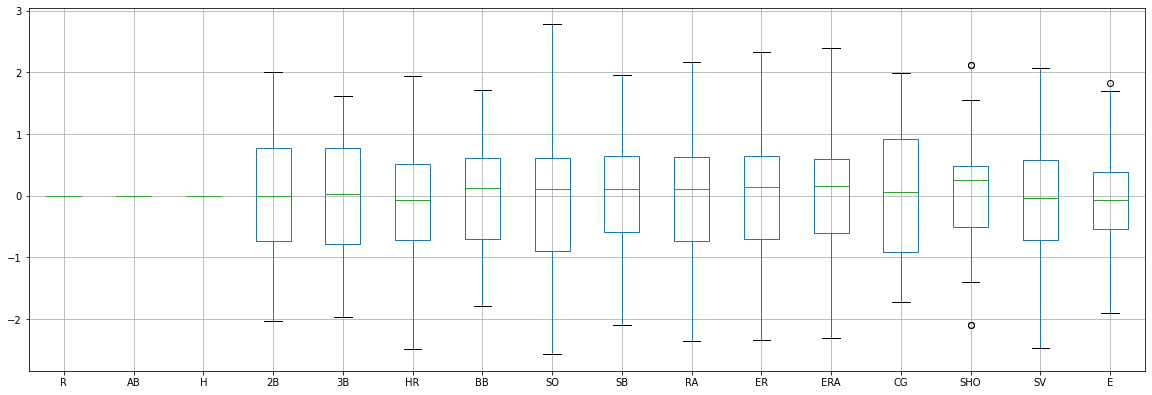

In [42]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
# Checked for Outliers through box plot graphs and found outliers in SHO and E

In [ ]:
# we can see individual boxplot for all features post removing outliers

<AxesSubplot:>

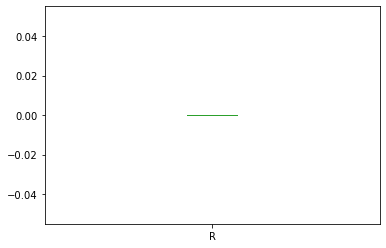

In [208]:
df['R'].plot.box()

In [144]:
# we can see in above boxplot, there is no outlier found in Runs (R) variable

<AxesSubplot:>

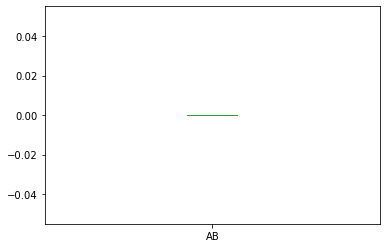

In [209]:
df['AB'].plot.box()

In [146]:
# we can see in above boxplot, there is no outlier found in At Bats (AB) variable

<AxesSubplot:>

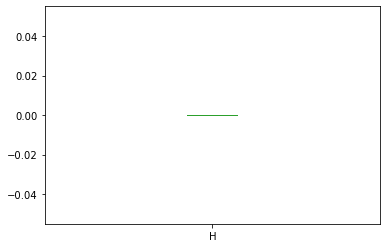

In [210]:
df['H'].plot.box()

In [149]:
# we can see in above boxplot, there is no outlier found in Hits (H) variable

<AxesSubplot:>

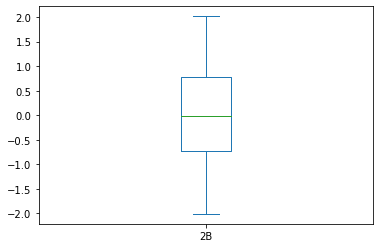

In [211]:
df['2B'].plot.box()

In [151]:
# we can see in above boxplot, there is no outlier found in Double (2B) variable

<AxesSubplot:>

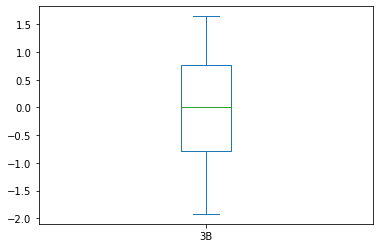

In [212]:
df['3B'].plot.box()

In [153]:
# we can see in above boxplot, there is no outlier found in Triples (3B) variable

<AxesSubplot:>

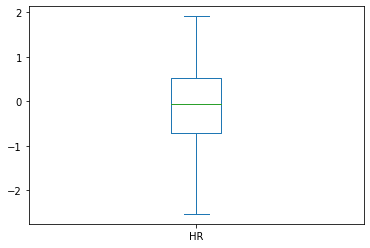

In [213]:
df['HR'].plot.box()

In [155]:
# we can see in above boxplot, there is no outlier found in Homeruns (HR) variable

<AxesSubplot:>

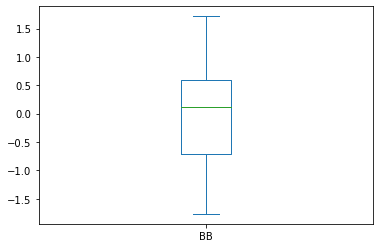

In [214]:
df['BB'].plot.box()

In [157]:
# we can see in above boxplot, there is no outlier found in Walks (BB) variable

<AxesSubplot:>

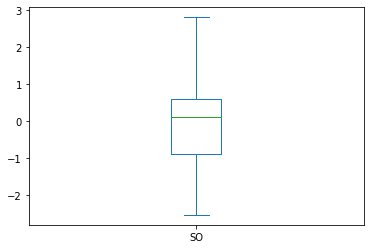

In [215]:
df['SO'].plot.box()

In [159]:
# we can see in above boxplot, there is no outlier found in Strikeouts (SO) variable

<AxesSubplot:>

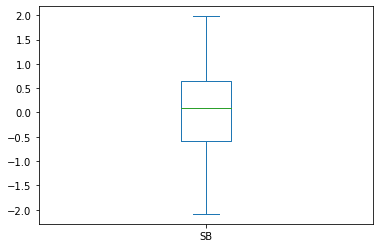

In [216]:
df['SB'].plot.box()

In [161]:
# we can see in above boxplot, there is no outlier found in Stolen Bases (SB) variable

<AxesSubplot:>

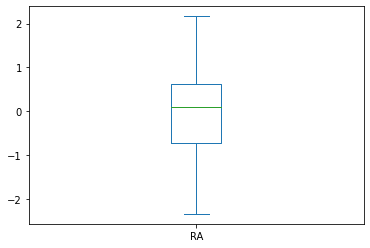

In [217]:
df['RA'].plot.box()

In [163]:
# we can see in above boxplot, there is no outlier found in Runs Allowed (RA) variable

<AxesSubplot:>

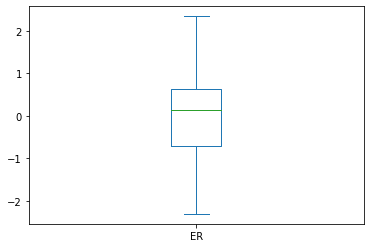

In [218]:
df['ER'].plot.box()

In [165]:
# we can see in above boxplot, there is no outlier found in Earned Runs (ER) variable

<AxesSubplot:>

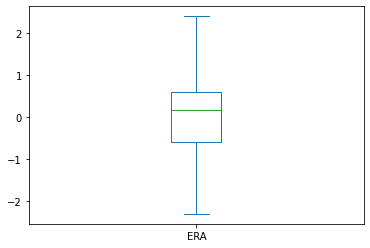

In [43]:
df['ERA'].plot.box()

In [167]:
# we can see in above boxplot, there is no outlier found in Earned Run Average (ERA) variable

<AxesSubplot:>

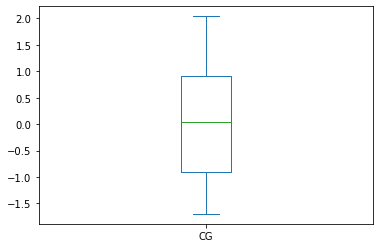

In [220]:
df['CG'].plot.box()

In [169]:
# we can see in above boxplot, there is no outlier found in shutouts (CG) variable

<AxesSubplot:>

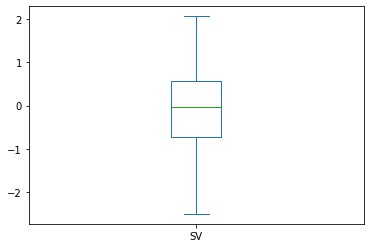

In [221]:
df['SV'].plot.box()

In [171]:
# we can see in above boxplot, there is no outlier found in saves (SV) variable

<AxesSubplot:>

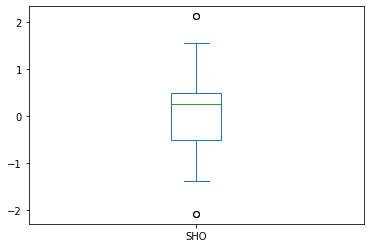

In [222]:
df['SHO'].plot.box()

In [173]:
# we can see in above boxplot, there are two outlier found in Complete games (SHO) variable

<AxesSubplot:>

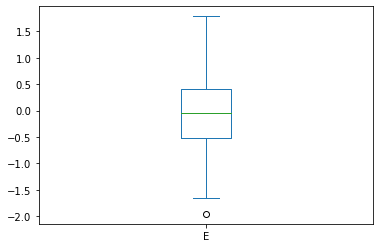

In [223]:
df['E'].plot.box()

In [175]:
# we can see in above boxplot, there is one outlier found in Error (E) variable

In [ ]:
# Outliers removal by using z-score method

In [52]:
from scipy.stats import zscore
z_score = zscore(df[['E','SHO']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score<3).all(axis=1)
df = df[filtering_entry]
df.describe

<bound method NDFrame.describe of       R   AB    H        2B        3B        HR        BB        SO        SB  \
0   0.0  0.0  0.0  1.477685  1.033103 -0.764626 -1.610915 -2.569896  0.939708   
1   0.0  0.0  0.0  0.084269  1.203320 -0.158581 -0.502749  0.134913 -0.539693   
2   0.0  0.0  0.0  1.670782 -0.160270 -0.689676  1.128294 -0.901254  0.211956   
3   0.0  0.0  0.0 -0.848600 -0.360521 -0.879049 -1.181207 -0.189628 -0.642564   
4   0.0  0.0  0.0  0.792183  1.616444 -0.329850 -0.206771  0.085459  0.079629   
5   0.0  0.0  0.0  1.998506 -1.461062  1.937860  1.708067 -0.957960  0.298238   
6   0.0  0.0  0.0 -0.198558 -1.224911  1.460099  1.461121 -0.228668 -0.910154   
7   0.0  0.0  0.0 -1.556454 -1.110302  1.583551 -0.904450  0.807174 -2.102897   
8   0.0  0.0  0.0  0.141687  0.130611  0.200058 -0.559191  0.594561  0.255285   
9   0.0  0.0  0.0  1.099405  0.225256  0.007404  0.204599 -0.986257 -0.489090   
10  0.0  0.0  0.0  0.199390  0.130611  0.355503  0.634349 -0.170084  0.8254

In [53]:
df.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.0,0.0,0.0,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.660331,-0.497425,-0.500893,-0.359844,-0.789579,1.546378,-0.334953
1,0.0,0.0,0.0,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.175465,0.257974,0.261806,-0.359844,0.251775,0.360444,-0.532211
2,0.0,0.0,0.0,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.674621,-0.746906,-0.636459,1.993513,-0.245393,-0.607594,-1.342331
3,0.0,0.0,0.0,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.189512,0.113575,0.060804,1.220103,-0.510759,-0.764453,0.678524
4,0.0,0.0,0.0,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.603228,1.582654,1.520959,1.220103,0.251775,-1.095010,-0.532211


In [ ]:
# Data Standardization

In [ ]:
# we will do scaling of data through standardScaler

In [226]:
# Scaling the Feature data

In [82]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)
x

array([[ 0.        ,  0.        ,  0.        ,  1.47768528,  1.03310301,
        -0.76462586, -1.61091476, -2.56989562,  0.93970819, -0.66033096,
        -0.49742469, -0.50089346, -0.35984364, -0.78957937,  1.546378  ,
        -0.3349525 ],
       [ 0.        ,  0.        ,  0.        ,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883,  0.13491294, -0.53969308,  0.17546536,
         0.25797351,  0.26180619, -0.35984364,  0.25177537,  0.36044386,
        -0.53221128],
       [ 0.        ,  0.        ,  0.        ,  1.67078208, -0.16026987,
        -0.68967629,  1.1282937 , -0.90125379,  0.2119555 , -0.67462053,
        -0.74690639, -0.63645949,  1.99351257, -0.24539345, -0.6075936 ,
        -1.34233137],
       [ 0.        ,  0.        ,  0.        , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.1896282 , -0.64256433,  0.18951225,
         0.11357524,  0.06080381,  1.22010317, -0.51075929, -0.76445333,
         0.67852361],
       [ 0.        ,  0.        ,  0

In [228]:
# Train Test Split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=100)

In [231]:
# Model Building

In [232]:
# Linear Regression Model Build:

In [57]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(r2_score(y_test,predlr))
print(mean_squared_error(y_test,predlr))
print(np.sqrt(mean_squared_error(y_test,predlr)))

-3.147807644153418
172.3644509903754
13.128764259837077


In [58]:
scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for Linear Regression Model is ',scr.mean())

Cross validation score for Linear Regression Model is  -1.4228754457347939


In [235]:
# Linear Regression Model difference is -3.14 - (-1.42) = -4.56

In [236]:
# Ridge Regression Model Build:

In [59]:
r = Ridge()
r.fit(x_train,y_train)
predr = r.predict(x_test)
print(r2_score(y_test,predr))
print(mean_squared_error(y_test,predr))
print(np.sqrt(mean_squared_error(y_test,predr)))

0.4614165187779695
22.3811357752266
4.730870509243156


In [60]:
scr = cross_val_score(r,x,y,cv=5)
print('Cross validation score for Ridge Regression Model is', scr.mean())

Cross validation score for Ridge Regression Model is 0.09088845646322344


In [239]:
# Ridge Regression Model difference is difference is 46.14 - 90.88 = -44.74

In [240]:
# Lasso Regression Model Build:

In [61]:
l = Lasso()
l.fit(x_train,y_train)
predl = l.predict(x_test)
print(r2_score(y_test,predl))
print(mean_squared_error(y_test,predl))
print(np.sqrt(mean_squared_error(y_test,predl)))

0.36975085829318255
26.190353222038862
5.11765114305761


In [62]:
scr = cross_val_score(l,x,y,cv=5)
print('Cross validation score for Lasso Regression Model is ', scr.mean())

Cross validation score for Lasso Regression Model is  0.16591005727077213


In [243]:
# Lasso Regression Model difference is 36.97 -16.59 = 20.38

In [244]:
# Random Forest Regressor Model Build:

In [63]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

-0.20336497326203284
50.00650000000004
7.071527416336589


In [64]:
scr = cross_val_score(rf,x,y,cv=5)
print('Cross validation score for Random Forest Regressor Model is', scr.mean())

Cross validation score for Random Forest Regressor Model is -0.7898167205664555


In [65]:
# Random Forest Regressor Model difference is -0.20 - -0.78 = -0.98

In [66]:
# Hyper Parameter Tuning

In [80]:
parameters1 = {'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
             'random_state': [200, 700, 900],
             'max_iter': [200, 900],
             'selection': ['cyclic','random']}
GCV=GridSearchCV(Lasso(),parameters1,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
                         'max_iter': [200, 900],
                         'random_state': [200, 700, 900],
                         'selection': ['cyclic', 'random']})

In [68]:
GCV.best_params_

{'alpha': 4.0, 'max_iter': 200, 'random_state': 200, 'selection': 'random'}

In [69]:
# Obtaining the Best Parameters for Hyper parameters tuning

In [81]:
mod1=Lasso(alpha=4.0,random_state=200,selection='cyclic',max_iter=200)

mod1.fit(x_train,y_train)
pred=mod1.predict(x_test)
print(r2_score(y_test,predrf)*100)
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

-20.336497326203286
50.00650000000004
7.071527416336589


In [ ]:
# Lasso Model mean squared error after Hyper parameter Tuning is 50%

In [ ]:
# Conclusion

In [ ]:
# As we can see that the randomness of the dataset should be reduced by reducing the number of variables.
# Which was done by mean-square dimension reduction.

In [8]:
#save the model 
jb.dump(Lasso, 'Baseball_casestudy.pk1')

['Baseball_casestudy.pk1']